In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In this cell we imported all libraries needed

In [ ]:
# Step 2: Prepare the Dataset for Training
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)
        self.features = self.data[["Sensor1","Sensor2","Sensor3","Sensor4","Sensor5"]]
        self.targets = self.data["Temperature"]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        features = torch.tensor(self.features.iloc[idx].values, dtype=torch.float32)
        target = torch.tensor(self.targets.iloc[idx], dtype=torch.float32).unsqueeze(0)
        return features, target


These functions will be implicitly called when we use dataLoader , they will read data and getitem function converts features and targets into corresponding tensors for each entry.

In [ ]:
# Load the dataset using the custom dataset class
file_path = "Data.csv"  # Update with the correct file path
dataset = CustomDataset(file_path)

This cell takes path of datafile

In [ ]:
# Step 3: Create a Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


In this cell init part intialises the linear regression model, and forward part will return output calculated from this model for each input.

In [ ]:
# Set hyperparameters
learning_rate = 0.1
num_epochs = 10
batch_size = 16
input_size = 5  # Update with the appropriate input size

# Initialize the model
model = LinearRegressionModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Create data loader for batching
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Training loop
iteration_list = []
loss_list = []
total_batches = len(dataloader)

for epoch in range(num_epochs):
    for batch_idx, (batch_features, batch_targets) in enumerate(dataloader):
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss and iteration
        iteration = epoch * total_batches + batch_idx
        iteration_list.append(iteration)
        loss_list.append(loss.item())


This cell takes in values of required parametres and executes the gradient descent which updates the values of parameters in each iteration with optimisation specified.This will also collects loss in each iteration and make it an array

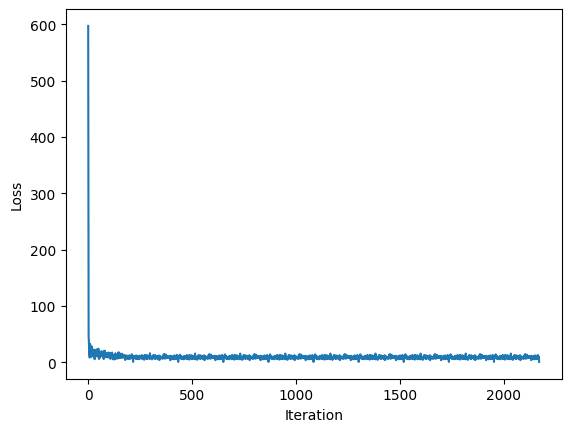

In [ ]:
# Plotting the iteration vs loss graph
plt.plot(iteration_list, loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


Plot generation

In [ ]:
print(loss_list[-1])
print(loss_list[-2])

0.5605276226997375
9.407958030700684


Printing the last 2 losses.